In [71]:
# Build the random forest model after normalizing the variable to house pricing from boston data set.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error,r2_score
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data)

In [10]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [54]:
# Analyzing the dependent and the target variables
features = pd.DataFrame(boston.data,columns=boston.feature_names)
print(features.head())
# Price is the target value here
target = pd.DataFrame(boston.target)
print(target.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
      0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


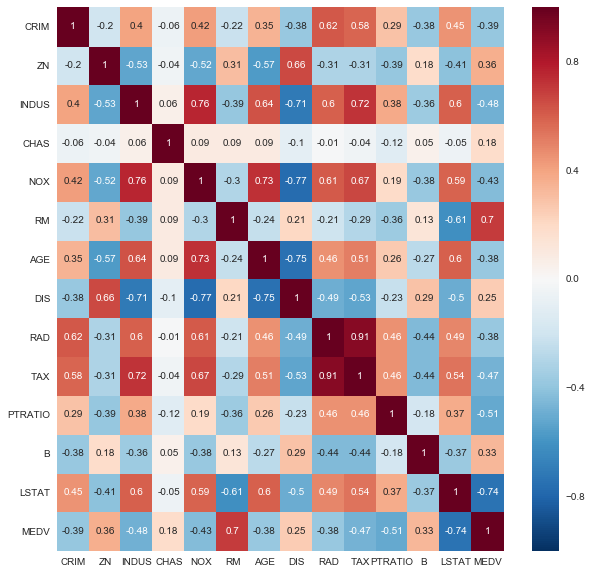

In [16]:
# Using a heat map to identify the co-relation between the two variables
boss_corr = pd.DataFrame(boston.data,columns=boston.feature_names)
# creating a new variable to include the target variable as well
boss_corr['MEDV'] = boston.target
correlation_matrix = boss_corr.corr().round(2)
# annot = True to print the values inside the square
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True)
# From the heatmap, we could infer that RAD<->TAX(Possitively correlated) AGE<->DIS(Negatively correlated) are highly correlated with each other.

In [60]:
# We drop the below columns as they are highly correlated to each other
features.drop(['RAD','TAX','AGE','DIS'],axis=1)
# Splitting our dataset into train and test dataset
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=4)

In [61]:
# Using the Random forest regressor () on our train dataset
r_for = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=0)
r_for.fit(x_train, y_train)
train_predictions = r_for.predict(x_train)

Train dataset analysis

Model Score : 0.8418923669308237 

MSE:  1.5555458213118687


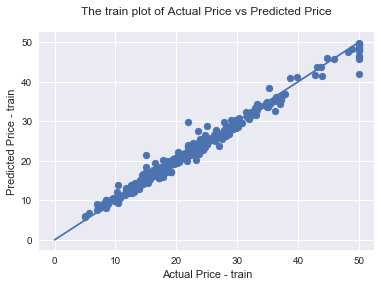

In [70]:
print("Train dataset analysis\n")
print("Model Score :",r_for.oob_score_,"\n")
# Calculating the mean squared value
mse = mean_squared_error(y_train, train_predictions)
print("MSE: ",mse)
plt.scatter(y_train,train_predictions,cmap='viridis')
plt.plot([0, 50], [0, 50], '-')
plt.xlabel("Actual Price - train")
plt.ylabel("Predicted Price - train")
plt.title("The train plot of Actual Price vs Predicted Price\n")
plt.show()

In [63]:
r_for.fit(x_test, y_test)
test_predictions = r_for.predict(x_test)

Test dataset analysis

Model Score : 0.8418923669308237 

MSE:  1.9990748099019173


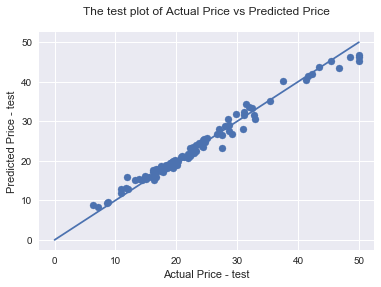

In [64]:
print("Test dataset analysis\n")
print("Model Score :",r_for.oob_score_,"\n")
# Calculating the mean squared value
mse = mean_squared_error(y_test, test_predictions)
print("MSE: ",mse)
plt.scatter(y_test,test_predictions,cmap='viridis')
plt.plot([0, 50], [0, 50], '-')
plt.xlabel("Actual Price - test")
plt.ylabel("Predicted Price - test")
plt.title("The test plot of Actual Price vs Predicted Price\n")
plt.show()